In [3]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [4]:
from mpl_toolkits.basemap import Basemap 
import numpy as np 

In [6]:
path = '/home/usuario/Escritorio/BELEN/geonet/GOES_16_Samples/OR_ABI-L2-CMIPF-M3C13_G16_s20183532145334_e20183532156112_c20183532156189.nc'

# Search for the GOES-R channel in the file name
Band = (path[path.find("M3C")+3:path.find("_G16")])
print ("ABI Band: " + Band)
 
# Search for the Scan Start in the file name
Start = (path[path.find("_s")+2:path.find("_e")])
print ("Observation Start: " + Start)
 
# Search for the Scan End in the file name
End = (path[path.find("_e")+2:path.find("_c")])
print ("Observation End: " + End)

# Format the "Observation Start" string
Start_Formatted = Start[0:4] + " Day " + Start[4:7] + " - " + Start [7:9] + ":" + Start [9:11] + ":" + Start [11:13] + "." + Start [13:14] + " UTC"
print (Start_Formatted)
 
# Format the "Observation End" string
End_Formatted = End[0:4] + " Day " + End[4:7] + " - " + End [7:9] + ":" + End [9:11] + ":" + End [11:13] + "." + End [13:14] + " UTC"
print (End_Formatted)


ABI Band: 13
Observation Start: 20183532145334
Observation End: 20183532156112
2018 Day 353 - 21:45:33.4 UTC
2018 Day 353 - 21:56:11.2 UTC


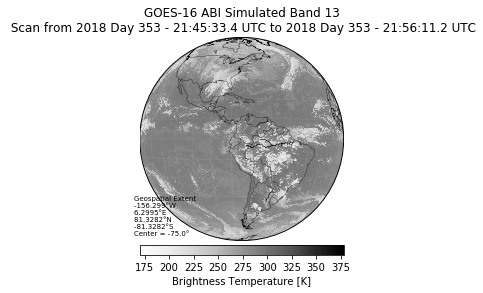

In [12]:
nc = Dataset(path)

data = nc.variables['CMI'][:] 
 
bmap = Basemap(projection='geos', lon_0=-75.0, lat_0=0.0, satellite_height=35786023.0, ellps='GRS80')


#bmap.bluemarble()
#bmap.shadedrelief()


bmap.imshow(data, origin='upper', vmin=170, vmax=378, cmap='Greys' )#alpha=0.5


#bmap.drawlsmask(ocean_color='aqua',lakes=True)
#bmap.drawlsmask(land_color='chartreuse')
 
bmap.drawcoastlines(linewidth=0.3, linestyle='solid', color='black')
bmap.drawcountries(linewidth=0.3, linestyle='solid', color='black')
bmap.drawparallels(np.arange(-90.0, 90.0, 10.0), linewidth=0.1, color='white')
bmap.drawmeridians(np.arange(0.0, 360.0, 10.0), linewidth=0.1, color='white')
 
bmap.colorbar(location='bottom', label='Brightness Temperature [K]')


plt.title("GOES-16 ABI Simulated Band " + Band + "\n Scan from " + Start_Formatted + " to " + End_Formatted)


geo_extent = nc.variables['geospatial_lat_lon_extent']
 
center = str(geo_extent.geospatial_lon_center)
west = str(geo_extent.geospatial_westbound_longitude)
east = str(geo_extent.geospatial_eastbound_longitude)
north = str(geo_extent.geospatial_northbound_latitude)
south = str(geo_extent.geospatial_southbound_latitude)
 
plt.text(-300000,300000,'Geospatial Extent \n' + west + '°W \n' + east + '°E \n' + north + '°N \n' + south + '°S \n' + 'Center = ' + center + '°', fontsize = 7)

DPI = 300
plt.savefig('/home/usuario/Escritorio/BELEN/geonet/Output/Tutorial3GOES-16_Ch13.png', dpi=DPI, bbox_inches='tight', pad_inches=0)
 
plt.show()